<a href="https://colab.research.google.com/github/dauparas/dauparas.github.io/blob/master/VAE_with_latent_subspaces_slideseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O ./example_data.tar.gz https://storage.googleapis.com/sabeti-public/dkotliar/cNMF/example_data_20180830.tar.gz
!tar -xzf ./example_data.tar.gz && rm ./example_data.tar.gz

--2019-09-06 16:45:05--  https://storage.googleapis.com/sabeti-public/dkotliar/cNMF/example_data_20180830.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6214340 (5.9M) [application/x-gzip]
Saving to: ‘./example_data.tar.gz’

./example_data.tar. 100%[===================>]   5.93M  --.-KB/s    in 0.04s   

2019-09-06 16:45:05 (138 MB/s) - ‘./example_data.tar.gz’ saved [6214340/6214340]

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended h

In [0]:
import numpy as np

In [0]:
import pandas as pd
dataset=pd.read_csv("./example_data/counts_prefiltered.txt",delimiter="\t")

In [0]:
X_raw = dataset.values[:, 1:].astype(np.float32)

In [0]:
X_raw.shape

(4080, 8097)

In [0]:
counts_per_cell = np.sum(X_raw, axis=1)

In [0]:
X_raw_c = X_raw/counts_per_cell[:, np.newaxis]

In [0]:
mean_over_cells = np.mean(X_raw_c, axis=0)

In [0]:
std_over_cells = np.std(X_raw_c, axis=0)

In [0]:
fano = std_over_cells**2/mean_over_cells

In [0]:
np.sort(fano)

array([0.00023974, 0.00027438, 0.00028795, ..., 0.01702818, 0.02135584,
       0.02973751], dtype=float32)

In [0]:
fano_indx = np.argwhere(fano < 0.001)

In [0]:
X = np.delete(X_raw_c, fano_indx, axis=1)

In [0]:
cellparams=pd.read_csv("./example_data/groundtruth_cellparams.txt",delimiter="\t")

In [0]:
U = cellparams.values[:, 1].astype(np.int16)[:,np.newaxis]

In [0]:
geneparams=pd.read_csv("./example_data/groundtruth_geneparams.txt",delimiter="\t")

In [0]:
geneparams

,Unnamed: 0,BaseGeneMean,is_outlier,outlier_ratio,gene_mean,prog_gene,prog_genemean,group1_DEratio,group1_genemean,group2_DEratio,group2_genemean,group3_DEratio,group3_genemean,group4_DEratio,group4_genemean,group5_DEratio,group5_genemean,group6_DEratio,group6_genemean,group7_DEratio,group7_genemean,group8_DEratio,group8_genemean,group9_DEratio,group9_genemean
0,Gene1,0.000301,False,1.0,0.000301,False,0.000301,1.000000,0.000301,1.0,0.000301,1.000000,0.000301,1.0,0.000301,1.000000,0.000301,1.0,0.000301,1.0,0.000301,1.000000,0.000301,1.0,0.000301
1,Gene2,0.000286,False,1.0,0.000286,False,0.000286,1.000000,0.000286,1.0,0.000286,1.000000,0.000286,1.0,0.000286,1.000000,0.000286,1.0,0.000286,1.0,0.000286,1.000000,0.000286,1.0,0.000286
2,Gene3,0.028388,False,1.0,0.028388,False,0.028388,1.000000,0.028388,1.0,0.028388,1.000000,0.028388,1.0,0.028388,1.000000,0.028388,1.0,0.028388,1.0,0.028388,1.000000,0.028388,1.0,0.028388
3,Gene4,0.027228,False,1.0,0.027228,False,0.027228,6.613936,0.180081,1.0,0.027228,1.000000,0.027228,1.0,0.027228,1.000000,0.027228,1.0,0.027228,1.0,0.027228,1.000000,0.027228,1.0,0.027228
4,Gene5,0.002961,False,1.0,0.002961,False,0.002961,1.000000,0.002961,1.0,0.002961,8.476354,0.025095,1.0,0.002961,1.000000,0.002961,1.0,0.002961,1.0,0.002961,1.000000,0.002961,1.0,0.002961
5,Gene6,0.019548,False,1.0,0.019548,False,0.019548,1.000000,0.019548,1.0,0.019548,1.000000,0.019548,1.0,0.019548,1.000000,0.019548,1.0,0.019548,1.0,0.019548,1.000000,0.019548,1.0,0.019548
6,Gene7,0.014260,False,1.0,0.014260,False,0.014260,1.000000,0.014260,1.0,0.014260,1.000000,0.014260,1.0,0.014260,1.000000,0.014260,1.0,0.014260,1.0,0.014260,1.000000,0.014260,1.0,0.014260
7,Gene8,0.000009,False,1.0,0.000009,False,0.000009,1.000000,0.000009,1.0,0.000009,1.000000,0.000009,1.0,0.000009,1.000000,0.000009,1.0,0.000009,1.0,0.000009,1.000000,0.000009,1.0,0.000009
8,Gene9,0.255918,False,1.0,0.255918,False,0.255918,1.000000,0.255918,1.0,0.255918,1.000000,0.255918,1.0,0.255918,1.000000,0.255918,1.0,0.255918,1.0,0.255918,1.000000,0.255918,1.0,0.255918
9,Gene10,0.000361,False,1.0,0.000361,False,0.000361,1.000000,0.000361,1.0,0.000361,1.000000,0.000361,1.0,0.000361,1.000000,0.000361,1.0,0.000361,1.0,0.000361,1.000000,0.000361,1.0,0.000361


In [0]:
tsne=pd.read_csv("./example_data/tsne.txt",delimiter="\t")

In [0]:
T = tsne.values[:,1:].astype(np.float32)

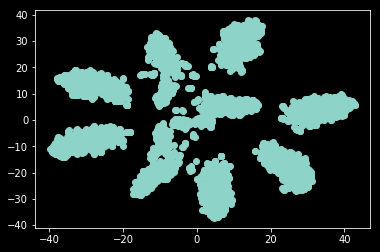

In [0]:
plt.scatter(T[:,0], T[:,1])

In [0]:
import sys, subprocess, shutil
IN_COLAB = 'google.colab' in sys.modules
print('Using colab?: {}'.format(IN_COLAB))
def run_cmd(cmd):
    print('Output of "{}":'.format(cmd))
    print(subprocess.run(cmd,stdout=subprocess.PIPE, shell=True).stdout.decode('utf-8'))
        
if IN_COLAB:
    run_cmd('sudo apt-get install git-lfs')
    run_cmd('git lfs install')
    run_cmd('rm -rf NMFreg_tutorial')
    run_cmd('git clone --verbose --progress https://github.com/tudaga/NMFreg_tutorial.git')
    run_cmd('mv NMFreg_tutorial/* .')
    run_cmd('rm -r NMFreg_tutorial')

Using colab?: True
Output of "sudo apt-get install git-lfs":
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 3s (816 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...

Output of "git lfs install":
Git LFS initialized.

Output of "rm -rf NMFreg_tutorial":

Output of "git clone --verbose --progress https://github.com/tudaga/NMFreg_tutorial.git":

Output of "mv NMFreg_tutorial/*

In [0]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import seaborn as sns
import scipy.stats
import scipy.optimize
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from matplotlib import colors
import matplotlib.patches as mpatches
import collections

%pylab inline

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


Variational Autoencoder Model (VAE) with latent subspaces based on:
https://arxiv.org/pdf/1812.06190.pdf

In [0]:
data_path = "data"

In [0]:
puck_coords_path = os.path.join(data_path, "coords.csv")
coords = pd.read_csv(puck_coords_path)
print(coords.shape)
coords.head()

(27261, 3)


,barcode,x,y
0,TTCTCCAAGGCCG,1478.453901,1810.524823
1,TACTAAAGAATTA,2224.000000,1230.397849
2,TCTCTTAGTTGGC,1914.742424,2221.954545
3,GCTTTTCGTTCCC,1682.151515,3886.575758
4,TACGGGCGAAAAG,2416.261194,4216.902985


In [0]:
coords.tail

<bound method NDFrame.tail of              barcode            x            y
0      TTCTCCAAGGCCG  1478.453901  1810.524823
1      TACTAAAGAATTA  2224.000000  1230.397849
2      TCTCTTAGTTGGC  1914.742424  2221.954545
3      GCTTTTCGTTCCC  1682.151515  3886.575758
4      TACGGGCGAAAAG  2416.261194  4216.902985
5      GTACCCTTCCGGG  3913.880342  1899.717949
6      TGGCCCTTGGAAC  1687.000000  3896.016393
7      ATGAAAATTTACG  4011.936170  1933.191489
8      AGGATTCGAAGTG  1488.681818  3711.649351
9      ATGTAACGTTGTC  1397.098765  3855.172840
10     GCACAAGGAAGTG  2520.027778  2388.430556
11     CATGCCGCTTGTA  1692.600000  3807.973333
12     ATCCTTTGCCACT  1529.016949  3859.152542
13     TTGCAACTGGAGT  2133.807692   856.788462
14     GATGTTTCCCAGG  2271.038462   747.000000
15     GAACGGGGGGTAT  3466.702128  4754.265957
16     GGGACAAGGGGGG  1683.463768  3738.166667
17     TGCGTGAAGGAAG  2584.092199  3640.815603
18     TCTCCAAAGGAAT  5070.902913  3673.932039
19     TGCCCACTTTAAC  1609.901

In [0]:
puck_counts_path = os.path.join(data_path, "counts.csv")
counts = pd.read_csv(puck_counts_path)
print(counts.shape)
counts.head()

(27261, 17920)


,barcode,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610030E20Rik,0610037L13Rik,0610038B21Rik,0610039K10Rik,0610040B10Rik,0610040F04Rik,0610040J01Rik,0610043K17Rik,1010001B22Rik,1110001J03Rik,1110002J07Rik,1110002L01Rik,1110002O04Rik,1110004E09Rik,1110004F10Rik,1110007C09Rik,1110008F13Rik,1110008L16Rik,1110008P14Rik,1110012L19Rik,1110015O18Rik,1110017D15Rik,1110018N20Rik,1110019D14Rik,1110020A21Rik,1110025M09Rik,1110032A03Rik,1110032F04Rik,1110034G24Rik,1110035H17Rik,1110037F02Rik,...,Zswim8,Zufsp,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,mmu-let-7f-1,mmu-mir-703,mt-Co1,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd5,mt-Nd6,mt-Rnr1,mt-Rnr2,mt-Ta,mt-Tc,mt-Tf,mt-Ti,mt-Tl1,mt-Tl2,mt-Tm,mt-Tp,mt-Tq,mt-Tr,mt-Ts2,mt-Tt,mt-Tv,n-R5-8s1
0,TTCTCCAAGGCCG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TACTAAAGAATTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TCTCTTAGTTGGC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GCTTTTCGTTCCC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TACGGGCGAAAAG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
choose = np.random.choice(range(27261), size=5000, replace=False)

In [0]:
X = X[:,1:]

In [0]:
np.max(X)

522

In [0]:
S = np.sort(np.sum(X, axis=0))

In [0]:
idx = np.argwhere(np.sum(X, axis=0) < 20)

In [0]:
idx.shape

(7079, 1)

In [0]:
idx[:,0]

array([[   10],
       [   11],
       [   13],
       ...,
       [17890],
       [17892],
       [17895]])

In [0]:
X.shape

(27261, 17919)

In [0]:
X1 = np.delete(X, idx[:,0], axis=1)

In [0]:
X1.shape

(27261, 10840)

In [0]:
np.save('slideseq5kdata', X1[choose,:])

In [0]:
X = counts.to_numpy()

In [0]:
np.save('slideseq10k', X[choose,:])

In [0]:
np.save('slideseq5kcoord', U[choose,:])

In [0]:
U.shape

(27261, 3)

In [0]:
X = X[:,1:]

In [0]:
X = X.astype(np.int16)

In [0]:
U = coords.to_numpy()

In [0]:
U = U[:,1:]
U = U.astype(np.float32)

In [0]:
U=U/np.max(U, axis=0)

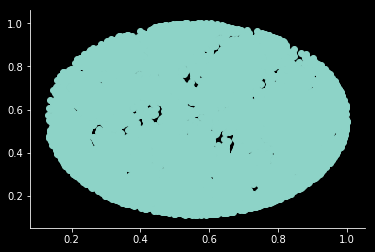

In [0]:
plt.scatter(U[:,0], U[:,1])

In [0]:
indx = np.argwhere((1000>np.sum(X, axis=1)) & (50<np.sum(X, axis=1)))

In [0]:
X = X[indx[:,0], :]
U = U[indx[:,0], :]

In [0]:
X = X/(np.sum(X, axis=1)[:, np.newaxis])

In [0]:
plt.figure(figsize(12, 12))
plt.scatter(coords['x'], coords['y'], c='k', s=2, alpha=0.6)
plt.axis('equal')
plt.title("Bead locations")
plt.show()

In [0]:
plt.figure(figsize(12, 12))
pyplot.set_cmap('viridis_r')
plt.scatter(coords['x'], coords['y'], 
            c=np.sum(counts.drop(['barcode'], axis=1), axis=1), 
            s=2, alpha=0.6)
plt.colorbar()
plt.axis('equal')
plt.title("Total # UMIs per bead")
plt.show()

In [0]:
#Step 1: import dependencies
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import regularizers
import time
from __future__ import division

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

%matplotlib inline
plt.style.use('dark_background')

import pandas as pd

Using TensorFlow backend.


In [0]:
U = np.load('./5kcoord.npy', allow_pickle=True)
X = np.load('./slideseqX.npy', allow_pickle=True)

In [0]:
U.shape

(5000, 2)

In [0]:
U = U.astype(np.float32)

In [0]:
U = U/np.max(np.abs(U), axis=0)

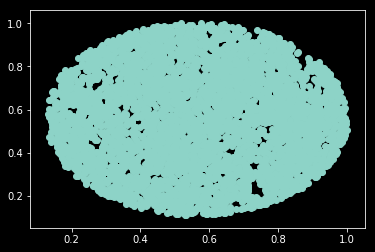

In [0]:
plt.scatter(U[:,0], U[:,1])

In [0]:
X.shape

(5000, 3183)

In [0]:
choose1 = np.random.choice(range(5000), size=1000, replace=False)

In [0]:
X = X[choose1, :]
U = U[choose1, :]

In [0]:
#Reconstruction loss
def x_given_w_z(w, z, output_size, training_phase, reg):
  with tf.variable_scope('M/x_given_w_z'):
    act = tf.nn.leaky_relu
    
    h = tf.concat((w,z), axis=-1)
    h = tf.layers.dense(h, 16, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 32, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 64, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 128, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 256, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 512, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 1024, act, kernel_regularizer=reg)
    loc = tf.layers.dense(h, output_size)
    #log_variance = tf.layers.dense(x, latent_size)
    #scale = tf.nn.softplus(log_variance)
    scale = 0.01*tf.ones(tf.shape(loc))
    return tfd.MultivariateNormalDiag(loc, scale)


#KL term for w
def w_given_x_y(x, y, latent_size, training_phase, reg): #+
  with tf.variable_scope('M/w_given_x_y'):
    act = tf.nn.leaky_relu
    h = tf.concat((x,y), axis=-1)
    
    h = tf.layers.dense(h, 1024, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 512, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 256, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 128, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 64, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 32, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 16, act, kernel_regularizer=reg)
    
    loc = tf.layers.dense(h,latent_size)
    log_variance = tf.layers.dense(h, latent_size)
    scale = tf.nn.softplus(log_variance)
    #scale = 0.01*tf.ones(tf.shape(loc))
    return tfd.MultivariateNormalDiag(loc, scale)

def w_given_y(y, y_size, training_phase, reg):
  with tf.variable_scope('M/w_given_y'):
    act = tf.nn.leaky_relu
    h = y
    
    h = tf.layers.dense(h, 16, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 32, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 64, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 128, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 256, act, kernel_regularizer=reg)
    
    loc = tf.layers.dense(h, y_size)
    log_variance = tf.layers.dense(h, y_size)
    scale = tf.nn.softplus(log_variance)
    return tfd.MultivariateNormalDiag(loc, scale)


#KL term for z
def z_given_x(x, latent_size, training_phase, reg): #+
  with tf.variable_scope('M/z_given_x'):
    act = tf.nn.leaky_relu
    h = x
    
    h = tf.layers.dense(h, 1024, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 512, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 256, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 128, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 64, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 32, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 16, act, kernel_regularizer=reg)
    
    loc = tf.layers.dense(h,latent_size)
    log_variance = tf.layers.dense(h, latent_size)
    scale = tf.nn.softplus(log_variance)
#     scale = 0.01*tf.ones(tf.shape(loc))
    return tfd.MultivariateNormalDiag(loc, scale)

def z_given(latent_size):
  with tf.variable_scope('M/z_given'):
    loc = tf.zeros(latent_size)
    scale = 0.1*tf.ones(tf.shape(loc))
    return tfd.MultivariateNormalDiag(loc, scale)


#For the Mutual information term
def y_given_z(z, y_size, training_phase, reg, reuse=None):
  with tf.variable_scope('N', reuse=reuse):
    act = tf.nn.leaky_relu
    h = z
    
    h = tf.layers.dense(h, 128, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 64, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 32, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 16, act, kernel_regularizer=reg)
    h = tf.layers.dense(h, 8, act, kernel_regularizer=reg)
    
    loc = tf.layers.dense(h, y_size)
    log_variance = tf.layers.dense(h, y_size)
    scale = tf.nn.softplus(log_variance)
    #scale = 0.01*tf.ones(tf.shape(loc))
    return tfd.MultivariateNormalDiag(loc, scale)

In [0]:
#Connect encoder and decoder and define the loss function
tf.reset_default_graph()

x_in = tf.placeholder(tf.float32, shape=[None, X.shape[1]], name='x_in')
x_out = tf.placeholder(tf.float32, shape=[None, X.shape[1]], name='x_out')
u_in = tf.placeholder(tf.float32, shape=[None, 2], name='u_in')
training_phase = tf.placeholder(tf.bool, None, name='training_phase')
reg = regularizers.l1_l2(l1=0.0, l2=0.0000001)

beta = np.array([1.0, 0.001, 0.0001, 0.001, 1.0])
#beta= np.array([100000.0, 1.0, 0.02, 10.0, 1.0])

z_latent_size = 8
w_latent_size = 8

M_learning_rate = 1e-3
N_learning_rate = 1e-3

#KL_w
wIy = w_given_y(u_in, w_latent_size, training_phase, reg)
wIxy = w_given_x_y(x_in, u_in, w_latent_size, training_phase, reg)
wIxy_sample = wIxy.sample()
wIxy_mean = wIxy.mean()
kl_w = tf.reduce_mean(wIxy.log_prob(wIxy_sample)- wIy.log_prob(wIxy_sample))
#kl_w = tf.reduce_mean(tfd.kl_divergence(wIxy, wIy)) #analytical

#KL_z
zI = z_given(z_latent_size)
zIx = z_given_x(x_in, z_latent_size, training_phase, reg)
zIx_sample = zIx.sample()
zIx_mean = zIx.mean()
kl_z = tf.reduce_mean(zIx.log_prob(zIx_sample)- zI.log_prob(zIx_sample))
#kl_z = tf.reduce_mean(tfd.kl_divergence(zIx, zI)) #analytical

#Reconstruction
xIwz = x_given_w_z(wIxy_sample, zIx_sample, X.shape[1], training_phase, reg)
rec_out = xIwz.mean()
rec_loss = tf.losses.mean_squared_error(x_out, rec_out)

M1 = beta[0]*rec_loss + beta[1]*kl_w + beta[2]*kl_z

yIz = y_given_z(zIx_sample, U.shape[1], training_phase, reg, reuse=False)
ent2 = -tf.reduce_mean(yIz.entropy())
M2 = beta[3]*ent2

M_reg = tf.losses.get_regularization_loss(scope='M/')

M_cost = M1 + M2 + M_reg

M_optimizer = tf.train.AdamOptimizer(M_learning_rate)

M_train_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='M/')
M_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='M/')

with tf.control_dependencies(M_update_ops):
  M_train = M_optimizer.minimize(M_cost, var_list=M_train_vars,
                                       name='train_M')

  
yIz_N = y_given_z(zIx_sample, U.shape[1], training_phase, reg, reuse=True)
logN = tf.reduce_mean(-yIz_N.log_prob(u_in))
N = beta[4]*logN

N_reg = tf.losses.get_regularization_loss(scope='N')

N_cost = N + N_reg



N_optimizer = tf.train.AdamOptimizer(N_learning_rate)

N_train_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='N')
N_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='N')

with tf.control_dependencies(N_update_ops):
  N_train = N_optimizer.minimize(N_cost, var_list=N_train_vars,
                                       name='train_N')

# Saver to save session for reuse
saver = tf.train.Saver()

W0905 16:19:59.412699 140539800672128 deprecation.py:323] From <ipython-input-13-e0e98e3257ca>:45: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0905 16:19:59.418025 140539800672128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0905 16:20:00.896906 140539800672128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the sa

In [0]:
#Helper function
def batch_generator(features, x, u, batch_size):
  """Function to create python generator to shuffle and split features into batches along the first dimension."""
  idx = np.arange(features.shape[0])
  np.random.shuffle(idx)
  for start_idx in range(0, features.shape[0], batch_size):
    end_idx = min(start_idx + batch_size, features.shape[0])
    part = idx[start_idx:end_idx]
    yield features[part,:], x[part,:] , u[part, :]

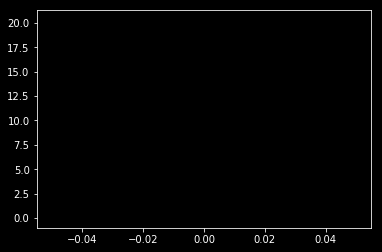

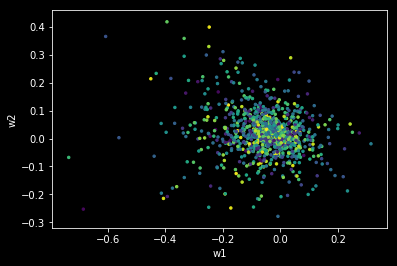

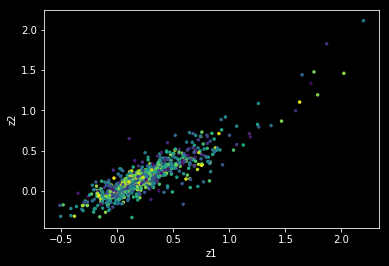

epoch: 1, M_loss: 0.5, M1_loss: 0.5, M2_loss: -0.0, N_loss: 1.10
epoch: 1, rec_loss: 0.49248949, kl_w: 0.99, kl_z: 101.47


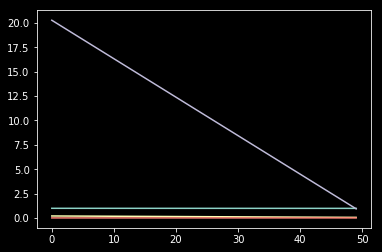

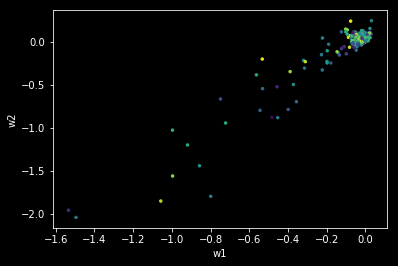

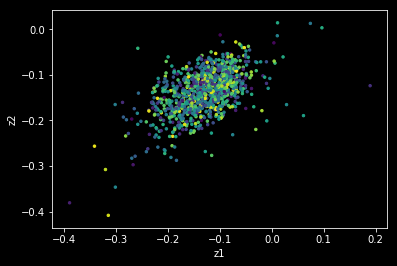

epoch: 50, M_loss: 0.5, M1_loss: 0.5, M2_loss: -0.0, N_loss: 0.17
epoch: 50, rec_loss: 0.48937771, kl_w: 0.27, kl_z: 4.65


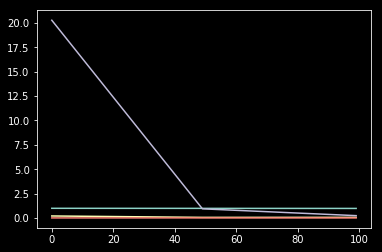

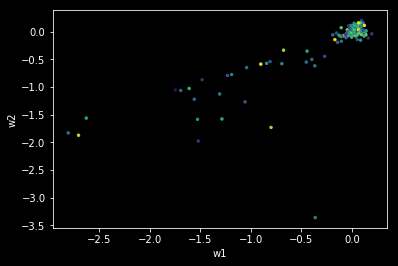

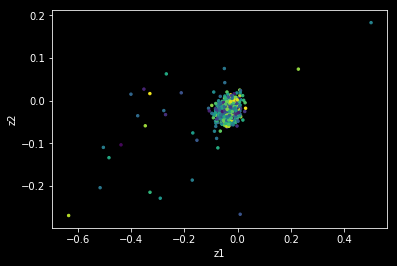

epoch: 100, M_loss: 0.5, M1_loss: 0.5, M2_loss: 0.0, N_loss: -0.07
epoch: 100, rec_loss: 0.48620084, kl_w: 0.28, kl_z: 1.16


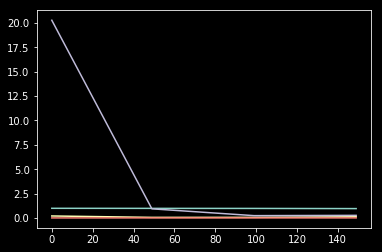

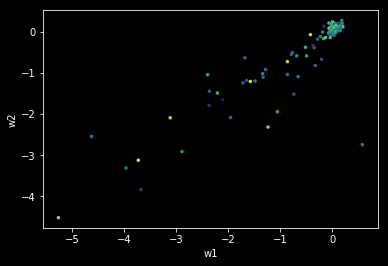

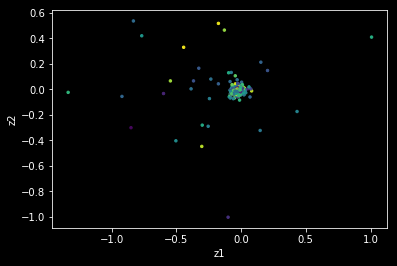

epoch: 150, M_loss: 0.5, M1_loss: 0.5, M2_loss: 0.0, N_loss: -0.08
epoch: 150, rec_loss: 0.47713742, kl_w: 0.57, kl_z: 1.30


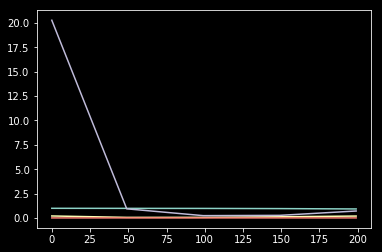

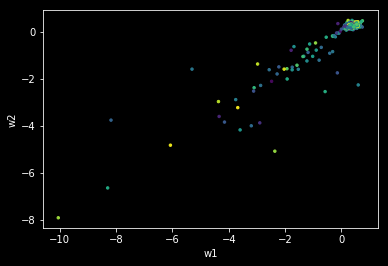

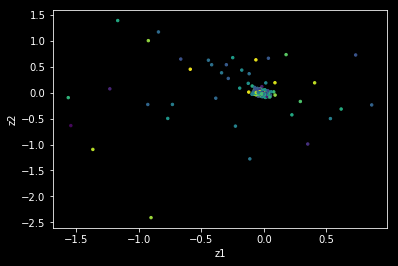

epoch: 200, M_loss: 0.5, M1_loss: 0.5, M2_loss: 0.0, N_loss: -0.08
epoch: 200, rec_loss: 0.45929095, kl_w: 0.95, kl_z: 3.54


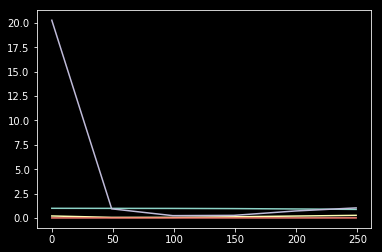

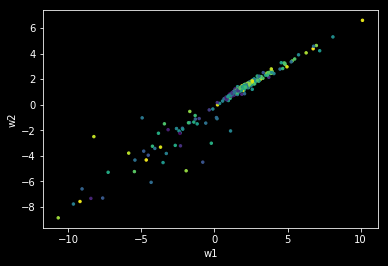

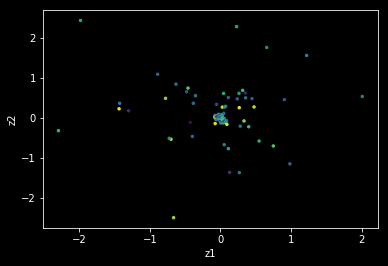

epoch: 250, M_loss: 0.4, M1_loss: 0.4, M2_loss: 0.0, N_loss: -0.08
epoch: 250, rec_loss: 0.43654233, kl_w: 1.30, kl_z: 5.14


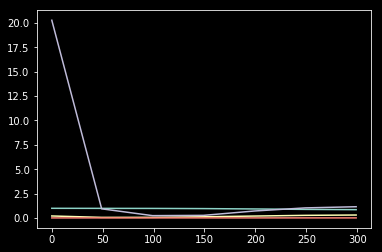

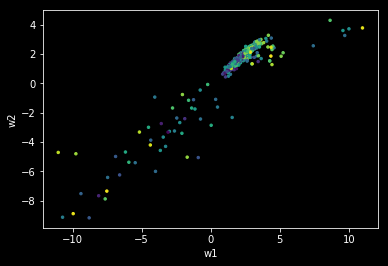

In [0]:
n_epochs = 15000
batch_size = X.shape[0]
start = time.time()
rec_out_plt = []
kl_w_plt= []
kl_z_plt = []
epoch_plt = []
M2_plt = []
N_loss_plt = []
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  
  for i in range(n_epochs):
    gen = batch_generator(X, X, U, batch_size) #create batch generator
    M_loss = 0
    N_loss = 0
    rec_loss_ = 0
    kl_w_ = 0
    kl_z_ = 0
    M1_ = 0
    M2_ = 0
    ent2_ = 0
    logN_ = 0
    
    for j in range(np.int(X.shape[0]/batch_size)):
      x_in_batch, x_out_batch, u_batch = gen.__next__()
      
      
      _, M_loss_, rec_loss__, kl_w__, kl_z__, M1__, ent2__, M2__= sess.run([M_train, M_cost, rec_loss, kl_w, kl_z, M1, ent2, M2], feed_dict={x_in: x_in_batch, x_out: x_out_batch, u_in: u_batch, training_phase:True})
      M_loss += M_loss_
      rec_loss_ += rec_loss__
      kl_w_ += kl_w__
      kl_z_ += kl_z__
      M1_ += M1__
      M2_ += M2__
      
      _, N_loss_, logN__= sess.run([N_train, N_cost, logN], feed_dict={x_in: x_in_batch, x_out: x_out_batch, u_in: u_batch, training_phase:True})
      N_loss += N_loss_
      logN_ += logN__
      
      
    if (i+1)% 50 == 0 or i == 0:
      wIxy_mean_, zIx_mean_, rec_out_= sess.run([wIxy_mean, zIx_mean, rec_out], feed_dict ={x_in:X, x_out:X, u_in:U, training_phase:False})
      rec_out_plt.append(rec_loss_)
      kl_w_plt.append(kl_w_/10.0)
      kl_z_plt.append(kl_z_/10.0)
      M2_plt.append(M2_/1.0)
      N_loss_plt.append(N_loss)
      epoch_plt.append(i)
      
      plt.figure(1) 
      plt.plot(epoch_plt[-10:], rec_out_plt[-10:])
      plt.plot(epoch_plt[-10:], kl_w_plt[-10:])
      plt.plot(epoch_plt[-10:], kl_z_plt[-10:])
      plt.plot(epoch_plt[-10:], M2_plt[-10:])
      
      plt.figure(2)
      plt.scatter(wIxy_mean_[:,0],wIxy_mean_[:,1], c=U[:,0], s=6.0, cmap='viridis');
      plt.xlabel('w1');
      plt.ylabel('w2');
      
      plt.figure(3)
      plt.scatter(zIx_mean_[:,0],zIx_mean_[:,1], c=U[:,0], s=6.0, cmap='viridis');
      plt.xlabel('z1');
      plt.ylabel('z2');
      plt.show()
      
      end = time.time()
      print('epoch: {0}, M_loss: {1:.1f}, M1_loss: {2:.1f}, M2_loss: {3:.1f}, N_loss: {4:.2f}'.format((i+1), M_loss/(1+np.int(X.shape[0]/batch_size)), M1_/(1+np.int(X.shape[0]/batch_size)), M2_/(1+np.int(X.shape[0]/batch_size)), N_loss_/(1+np.int(X.shape[0]/batch_size))))
      print('epoch: {0}, rec_loss: {1:.8f}, kl_w: {2:.2f}, kl_z: {3:.2f}'.format((i+1), rec_loss_/(1+np.int(X.shape[0]/batch_size)), kl_w_/(1+np.int(X.shape[0]/batch_size)), kl_z_/(1+np.int(X.shape[0]/batch_size))))
      start = time.time()

In [0]:
plt.figure(2)
plt.scatter(wIxy_mean_[:,0],wIxy_mean_[:,1], c=U[:,1], s=6.0, cmap='viridis');
plt.xlabel('w1');
plt.ylabel('w2');

NameError: ignored

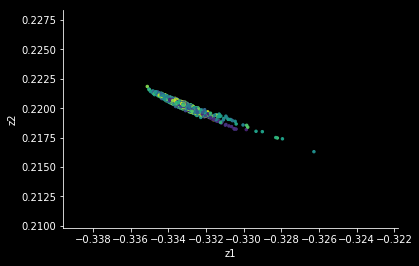

In [0]:
plt.figure(3)
plt.scatter(zIx_mean_[:,0],zIx_mean_[:,1], c=U[:,0], s=6.0, cmap='viridis');
plt.xlabel('z1');
plt.ylabel('z2');
plt.show()